# **EEG-Based Motor Imagery Decoding with Deep Learning**
Author: Anthony Nguyen

Student ID: 40210667

Course: COMP 432

Presented to: Professor Mirco Ravanelli

## **Abstract**
This project explores the development of novel neural networks for EEG-based motor imagery decoding, aiming to enhance Brain-Computer Interface (BCI) technology for therapeutic and assistive use. The methodology employed involves hyperparameter tuning conducted in two phases to optimize neural network performance. A series of experiments were designed to evaluate the effectiveness of the proposed models against established benchmarks. The most promising model achieved an accuracy of 37.6415% ± 0.5603, representing a 10% improvement over the nearest alternative model but still significantly trailing behind the state-of-the-art EEGNet. This project contributes to the ongoing dialogue in BCI research.


## **Introduction**

The problem being addressed is the development of robust and efficient EEG-based Motor Imagery Decoding techniques using neural networks, particularly for individuals with paralysis or neuromuscular disorders. This technological approach is vital as it provides a non-invasive means for such individuals to communicate and interact with their environment, thereby enhancing their quality of life.

The ability to decode motor imagery from EEG data is critical for developing brain-computer interfaces (BCIs) that can provide communication and control options for people who are unable to move voluntarily due to severe physical disabilities. This technology not only aims to restore basic communication but also enhances the autonomy of affected individuals, potentially reducing the need for constant care and improving mental health outcomes.


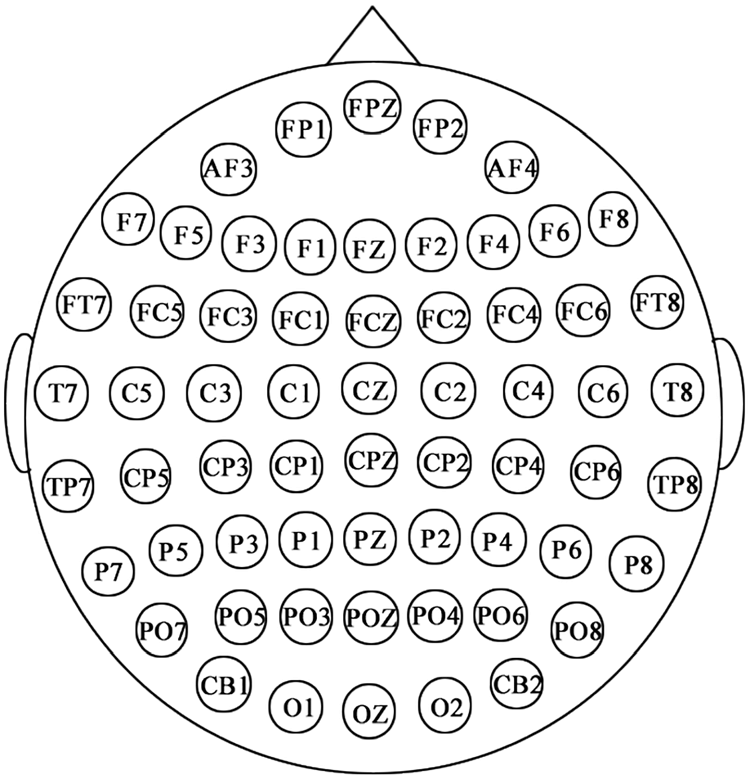

Figure 1: EEG Cap Layout [1]


Main Challenges:

- Signal Quality and Interpretation: EEG signals are notoriously noisy and exhibit significant variability between individuals. Extracting reliable and interpretable signals that accurately reflect motor imagery intentions is challenging.

- Limited Data: The availability of large, annotated datasets for training deep learning models is limited, posing challenges for training robust models.

More recent approaches to address these challenges involve deep learning models that can automatically extract features from raw EEG data. For instance, Lawhern et al. introduced EEGNet, a compact convolutional neural network that generalizes well across different BCI paradigms and requires less training data compared to traditional methods [2]. This model encapsulates depthwise and separable convolutions to optimize performance.
Additionally, Lotte et al. provided a comprehensive review of classification algorithms used in EEG-based BCIs, updating the community on the advancements over ten years and identifying promising techniques like adaptive classifiers and transfer learning for enhancing BCI performance [3].

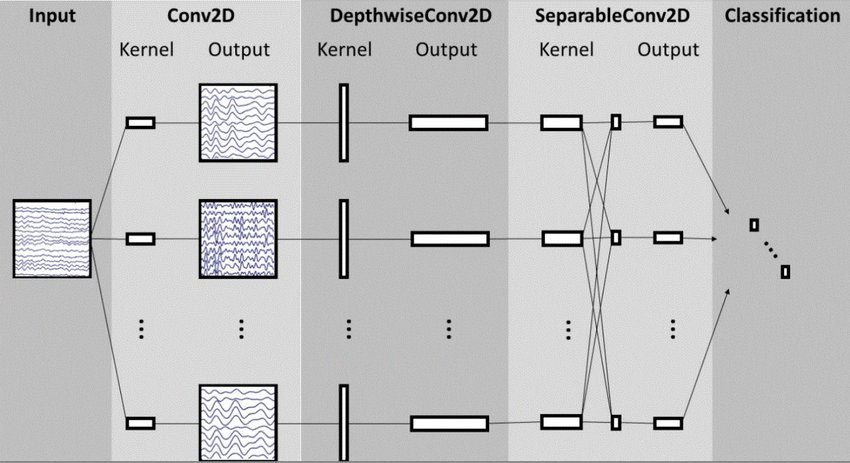

Figure 2: Architecture of EEGNet [4]



My project builds on these foundational studies by focusing on convolutional neural network architectures that are specifically designed for EEG data, such as EEGNet. My goal is to implement novel neural networks that have not been implemented yet in this context. The project aims to overcome the inherent challenges of EEG-based motor imagery decoding and push the boundaries of what is possible in BCI technology for therapeutic and assistive use.





## **Methodology**


### Designing Model

I had to develop my own models capable of decoding EEG data, by designing the architecture as shown below and implementing it in Python using PyTorch. The Python implenmentation is found in Experimental Setup. Multiple regularization techniques such as dropout were implemented, as well as hyperparameter tuning, described in the Experimental Setup.

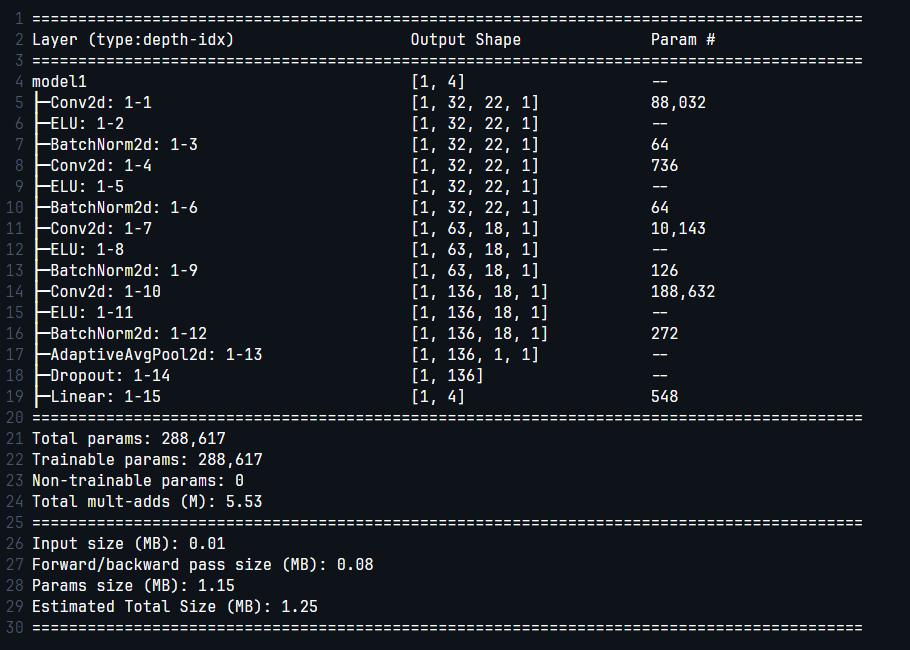


Figure 3: Best Model (Model 1) Architecture (run1/sub-001/0train/model.txt)

### Running the Experiments
I had to run the experiments on my models in order to train them and optimize their hyperparameters. More details in Experimental Setup. Metrics such as accuracy were obtained, which gave me an idea of how well my models are performing.

## **Experimental Setup**

Run this code cell to download the requirements.

In [ ]:
import shutil # To change location of files

!git clone https://github.com/speechbrain/benchmarks.git
%cd benchmarks
!git submodule update --init --recursive
%cd speechbrain
!pip install -r requirements.txt
!pip install -e .

%cd /content/benchmarks/benchmarks/MOABB
!pip install -r ../../requirements.txt
!pip install -r extra-requirements.txt

!git clone https://github.com/anthonyng041/COMP-432-Project.git # Import my models
shutil.move("/content/benchmarks/benchmarks/MOABB/COMP-432-Project/models/model1.py", "/content/benchmarks/benchmarks/MOABB/models")
shutil.move("/content/benchmarks/benchmarks/MOABB/COMP-432-Project/models/model2.py", "/content/benchmarks/benchmarks/MOABB/models")
shutil.move("/content/benchmarks/benchmarks/MOABB/COMP-432-Project/models/model3.py", "/content/benchmarks/benchmarks/MOABB/models")

### Dataset
The BNCI2014001 dataset comprises EEG data from 9 subjects that were asked to do motor imagery tasks. The tasks include imagining movement of the left hand, right hand, both feet, and tongue, each representing a class. The subjects participated in two sessions on different days, each session consisting of 6 runs with 48 trials per run (12 for each motor imagery task). Each recording is a multi-channel signal, since multiple EEG sensors are placed on the head labeled with the motor imagery task that the subject is asked to do during that session [5].

### Training
Leave-One-Session-Out cross-validation is the prefered strategy to use for training, where one session per subject is part of the test set while the remainder are used for training. The alternative, Leave-One-Subject-Out, where a single subject is used as the test set while the others are for training is more challenging since each person has a unique brain activity according to Ravanelli et al [6]. Furthermore, the experiments are ran multiple times and their performance is averaged in order to improve result significance.

### Hyperparameter Tuning
All hyperparameters are included in yaml files, which also includes orion flags for hyperparamter tuning. Hyperparameter tuning is done in two steps, where the first step optimizes a subset of hyperparameters while keeping the rest fixed and the second optimizes the rest."This approach has consistently demonstrated superior results in our benchmark, especially when distinguishing between training and architectural hyperparameters versus data augmentation hyperparameters" [6].

### Hyperparameters
The yaml files containing the hyperparameters and orion flags for tuning remain largely unchanged from the EEGNet.yaml file given by Ravanelli et al [6]. The main differences are the hyperparameters and hyperparameter tuning for the models, since my models are distinct from EEGNet.

###Model 1 (Best Model)

Here is the yaml file for Model 1. No need to run this cell since it is already imported.

In [ ]:
model1_hyperparameters = """
seed: 1234
__set_torchseed: !apply:torch.manual_seed [!ref <seed>]

# DIRECTORIES
data_folder: !PLACEHOLDER  #'/path/to/dataset'. The dataset will be automatically downloaded in this folder
cached_data_folder: !PLACEHOLDER #'path/to/pickled/dataset'
output_folder: !PLACEHOLDER #'path/to/results'

# DATASET HPARS
# Defining the MOABB dataset.
dataset: !new:moabb.datasets.BNCI2014001
save_prepared_dataset: True # set to True if you want to save the prepared dataset as a pkl file to load and use afterwards
data_iterator_name: !PLACEHOLDER
target_subject_idx: !PLACEHOLDER
target_session_idx: !PLACEHOLDER
events_to_load: null # all events will be loaded
original_sample_rate: 250 # Original sampling rate provided by dataset authors
sample_rate: 125 # Target sampling rate (Hz)
# band-pass filtering cut-off frequencies
fmin: 0.13 # @orion_step1: --fmin~"uniform(0.1, 5, precision=2)"
fmax: 46.0 # @orion_step1: --fmax~"uniform(20.0, 50.0, precision=3)"
n_classes: 4
# tmin, tmax respect to stimulus onset that define the interval attribute of the dataset class
# trial begins (0 s), cue (2 s, 1.25 s long); each trial is 6 s long
# dataset interval starts from 2
# -->tmin tmax are referred to this start value (e.g., tmin=0.5 corresponds to 2.5 s)
tmin: 0.
tmax: 4.0 # @orion_step1: --tmax~"uniform(1.0, 4.0, precision=2)"
# number of steps used when selecting adjacent channels from a seed channel (default at Cz)
n_steps_channel_selection: 2 # @orion_step1: --n_steps_channel_selection~"uniform(1, 3,discrete=True)"
T: !apply:math.ceil
    - !ref <sample_rate> * (<tmax> - <tmin>)
C: 22
# We here specify how to perfom test:
# - If test_with: 'last' we perform test with the latest model.
# - if test_with: 'best, we perform test with the best model (according to the metric specified in test_key)
# The variable avg_models can be used to average the parameters of the last (or best) N saved models before testing.
# This can have a regularization effect. If avg_models: 1, the last (or best) model is used directly.
test_with: 'last' # 'last' or 'best'
test_key: "acc" # Possible opts: "loss", "f1", "auc", "acc"

# METRICS
f1: !name:sklearn.metrics.f1_score
    average: 'macro'
acc: !name:sklearn.metrics.balanced_accuracy_score
cm: !name:sklearn.metrics.confusion_matrix
metrics:
    f1: !ref <f1>
    acc: !ref <acc>
    cm: !ref <cm>
# TRAINING HPARS
n_train_examples: 100  # it will be replaced in the train script
# checkpoints to average
avg_models: 10 # @orion_step1: --avg_models~"uniform(1, 15,discrete=True)"
number_of_epochs: 862 # @orion_step1: --number_of_epochs~"uniform(250, 1000, discrete=True)"
lr: 0.0001 # @orion_step1: --lr~"choices([0.01, 0.005, 0.001, 0.0005, 0.0001])"
# Learning rate scheduling (cyclic learning rate is used here)
max_lr: !ref <lr> # Upper bound of the cycle (max value of the lr)
base_lr: 0.00000001 # Lower bound in the cycle (min value of the lr)
step_size_multiplier: 5 #from 2 to 8
step_size: !apply:round
    - !ref <step_size_multiplier> * <n_train_examples> / <batch_size>
lr_annealing: !new:speechbrain.nnet.schedulers.CyclicLRScheduler
    base_lr: !ref <base_lr>
    max_lr: !ref <max_lr>
    step_size: !ref <step_size>
label_smoothing: 0.0
loss: !name:speechbrain.nnet.losses.nll_loss
    label_smoothing: !ref <label_smoothing>
optimizer: !name:torch.optim.Adam
    lr: !ref <lr>
epoch_counter: !new:speechbrain.utils.epoch_loop.EpochCounter  # epoch counter
    limit: !ref <number_of_epochs>
batch_size_exponent: 4 # @orion_step1: --batch_size_exponent~"uniform(4, 6,discrete=True)"
batch_size: !ref 2 ** <batch_size_exponent>
valid_ratio: 0.2

# DATA AUGMENTATION
# cutcat (disabled when min_num_segments=max_num_segments=1)
max_num_segments: 3 # @orion_step2: --max_num_segments~"uniform(2, 6, discrete=True)"
cutcat: !new:speechbrain.augment.time_domain.CutCat
    min_num_segments: 2
    max_num_segments: !ref <max_num_segments>
# random amplitude gain between 0.5-1.5 uV (disabled when amp_delta=0.)
amp_delta: 0.01742 # @orion_step2: --amp_delta~"uniform(0.0, 0.5)"
rand_amp: !new:speechbrain.augment.time_domain.RandAmp
    amp_low: !ref 1 - <amp_delta>
    amp_high: !ref 1 + <amp_delta>
# random shifts between -300 ms to 300 ms (disabled when shift_delta=0.)
shift_delta_: 1 # orion_step2: --shift_delta_~"uniform(0, 25, discrete=True)"
shift_delta: !ref 1e-2 * <shift_delta_> # 0.250 # 0.-0.25 with steps of 0.01
min_shift: !apply:math.floor
    - !ref 0 - <sample_rate> * <shift_delta>
max_shift: !apply:math.floor
    - !ref 0 + <sample_rate> * <shift_delta>
time_shift: !new:speechbrain.augment.freq_domain.RandomShift
    min_shift: !ref <min_shift>
    max_shift: !ref <max_shift>
    dim: 1
# injection of gaussian white noise
snr_white_low: 15.0 # @orion_step2: --snr_white_low~"uniform(0.0, 15, precision=2)"
snr_white_delta: 19.1 # @orion_step2: --snr_white_delta~"uniform(5.0, 20.0, precision=3)"
snr_white_high: !ref <snr_white_low> + <snr_white_delta>
add_noise_white: !new:speechbrain.augment.time_domain.AddNoise
    snr_low: !ref <snr_white_low>
    snr_high: !ref <snr_white_high>

repeat_augment: 1 # @orion_step1: --repeat_augment 0
augment: !new:speechbrain.augment.augmenter.Augmenter
    parallel_augment: True
    concat_original: True
    parallel_augment_fixed_bs: True
    repeat_augment: !ref <repeat_augment>
    shuffle_augmentations: True
    min_augmentations: 4
    max_augmentations: 4
    augmentations: [
        !ref <cutcat>,
        !ref <rand_amp>,
        !ref <time_shift>,
        !ref <add_noise_white>]

# DATA NORMALIZATION
dims_to_normalize: 1 # 1 (time) or 2 (EEG channels)
normalize: !name:speechbrain.processing.signal_processing.mean_std_norm
    dims: !ref <dims_to_normalize>

# MODEL
input_shape: [null, !ref <T>, !ref <C>, null]
dropout: 0.008464 # @orion_step1: --dropout~"uniform(0.0, 0.5)"
hparam1: 32 # @orion_step1: --hparam1~"uniform(3, 50, discrete=True)"
hparam2: 64 # @orion_step1: --hparam2~"uniform(50, 100, discrete=True)"
hparam3: 128 # @orion_step1: --hparam3~"uniform(100, 150, discrete=True)"
hparam4: 3 # @orion_step1: --hparam4~"uniform(2, 24, discrete=True)"
hparam5: 2 # @orion_step1: --hparam5~"uniform(1, 8, discrete=True)"

model: !new:models.model1.model1
    input_shape: !ref <input_shape>
    num_classes: !ref <n_classes>
    dropout_rate: !ref <dropout>
    hparam1: !ref <hparam1>
    hparam2: !ref <hparam2>
    hparam3: !ref <hparam3>
    hparam4: [!ref <hparam4>, 1]
    hparam5: [!ref <hparam5>, 1]
"""

Here is the code for Model 1. No need to run this cell since it is already imported.

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class model1(nn.Module):
    """
    This model includes multiple convolutional layers with depth-wise separable
    convolutions, batch normalization, ELU activations, adaptive average pooling, and a fully connected output layer.

    Arguments
    ---------
    input_shape : tuple
        The shape of the input.
    num_classes : int
        The number of output classes for the classification task.
    dropout_rate : float
        The dropout probability used in the dropout layer for regularization.
    hparam1 : int
        The number of filters in the first convolutional layer.
    hparam2 : int
        The number of filters in the third convolutional layer.
    hparam3 : int
        The number of filters in the fourth convolutional layer.
    hparam4 : tuple
        The kernel size for the first and fourth convolutional layers.
    hparam5 : tuple
        The kernel size for the third convolutional layer.

    Example
    -------
    >>> import torch
    >>> inp_tensor = torch.rand([1, 64, 3, 1])
    >>> model = model1(input_shape=inp_tensor.shape)
    >>> output = model(inp_tensor)
    >>> output.shape
    torch.Size([1, 10])
    """
    def __init__(self, input_shape, num_classes, dropout_rate, hparam1 = 32, hparam2 = 64, hparam3 = 128, hparam4 = (1,3), hparam5 = (1,1)):
        super(model1, self).__init__()
        # Extract T and C from input_shape
        _, T, C, _ = input_shape

        # First convolution layer
        self.conv1 = nn.Conv2d(T, hparam1, hparam4, padding='same')
        self.bn1 = nn.BatchNorm2d(hparam1)  # Batch normalization
        self.activation1 = nn.ELU()    # ELU activation function for non-linearity

        # Second convolution layer
        self.conv2 = nn.Conv2d(hparam1, hparam1, hparam4, groups=hparam1, padding='same')
        self.bn2 = nn.BatchNorm2d(hparam1)
        self.activation2 = nn.ELU()

        # Third convolution layer
        self.conv3 = nn.Conv2d(hparam1, hparam2, hparam5)
        self.bn3 = nn.BatchNorm2d(hparam2)
        self.activation3 = nn.ELU()

        # Fourth convolution layer
        self.conv4 = nn.Conv2d(hparam2, hparam3, hparam4, padding='same', dilation=2)
        self.bn4 = nn.BatchNorm2d(hparam3)
        self.activation4 = nn.ELU()

        # Adaptive average pooling to reduce spatial dimensions to 1x1
        self.adaptive_pool = nn.AdaptiveAvgPool2d((1,1))

        # Fully connected layer to map the features to the class scores
        self.fc1 = nn.Linear(hparam3, num_classes)

        # Dropout for regularization to reduce overfitting
        self.dropout = nn.Dropout(dropout_rate)

    def forward(self, x):
        """Returns the output of the model.

        Arguments
        ---------
        x : torch.Tensor (batch, time, EEG channel, channel)
            Input to convolve. 4d tensors are expected.
        """
        # Applying layers sequentially
        x = self.bn1(self.activation1(self.conv1(x)))
        x = self.bn2(self.activation2(self.conv2(x)))
        x = self.bn3(self.activation3(self.conv3(x)))
        x = self.bn4(self.activation4(self.conv4(x)))
        x = self.adaptive_pool(x)
        # Flatten the output for the fully connected layer
        x = x.view(x.size(0), -1)
        x = self.dropout(x)
        x = self.fc1(x)
        # Applying log_softmax for the output layer to prepare for a classification task
        return F.log_softmax(x, dim=1)

###Model 2

Here is the yaml file for Model 2. No need to run this cell since it is already imported.

In [ ]:
model2_hyperparameters = """
seed: 1234
__set_torchseed: !apply:torch.manual_seed [!ref <seed>]

# DIRECTORIES
data_folder: !PLACEHOLDER  #'/path/to/dataset'. The dataset will be automatically downloaded in this folder
cached_data_folder: !PLACEHOLDER #'path/to/pickled/dataset'
output_folder: !PLACEHOLDER #'path/to/results'

# DATASET HPARS
# Defining the MOABB dataset.
dataset: !new:moabb.datasets.BNCI2014001
save_prepared_dataset: True # set to True if you want to save the prepared dataset as a pkl file to load and use afterwards
data_iterator_name: !PLACEHOLDER
target_subject_idx: !PLACEHOLDER
target_session_idx: !PLACEHOLDER
events_to_load: null # all events will be loaded
original_sample_rate: 250 # Original sampling rate provided by dataset authors
sample_rate: 125 # Target sampling rate (Hz)
# band-pass filtering cut-off frequencies
fmin: 0.13 # @orion_step1: --fmin~"uniform(0.1, 5, precision=2)"
fmax: 46.0 # @orion_step1: --fmax~"uniform(20.0, 50.0, precision=3)"
n_classes: 4
# tmin, tmax respect to stimulus onset that define the interval attribute of the dataset class
# trial begins (0 s), cue (2 s, 1.25 s long); each trial is 6 s long
# dataset interval starts from 2
# -->tmin tmax are referred to this start value (e.g., tmin=0.5 corresponds to 2.5 s)
tmin: 0.
tmax: 4.0 # @orion_step1: --tmax~"uniform(1.0, 4.0, precision=2)"
# number of steps used when selecting adjacent channels from a seed channel (default at Cz)
n_steps_channel_selection: 2 # @orion_step1: --n_steps_channel_selection~"uniform(1, 3,discrete=True)"
T: !apply:math.ceil
    - !ref <sample_rate> * (<tmax> - <tmin>)
C: 22
# We here specify how to perfom test:
# - If test_with: 'last' we perform test with the latest model.
# - if test_with: 'best, we perform test with the best model (according to the metric specified in test_key)
# The variable avg_models can be used to average the parameters of the last (or best) N saved models before testing.
# This can have a regularization effect. If avg_models: 1, the last (or best) model is used directly.
test_with: 'last' # 'last' or 'best'
test_key: "acc" # Possible opts: "loss", "f1", "auc", "acc"

# METRICS
f1: !name:sklearn.metrics.f1_score
    average: 'macro'
acc: !name:sklearn.metrics.balanced_accuracy_score
cm: !name:sklearn.metrics.confusion_matrix
metrics:
    f1: !ref <f1>
    acc: !ref <acc>
    cm: !ref <cm>
# TRAINING HPARS
n_train_examples: 100  # it will be replaced in the train script
# checkpoints to average
avg_models: 10 # @orion_step1: --avg_models~"uniform(1, 15,discrete=True)"
number_of_epochs: 862 # @orion_step1: --number_of_epochs~"uniform(250, 1000, discrete=True)"
lr: 0.0001 # @orion_step1: --lr~"choices([0.01, 0.005, 0.001, 0.0005, 0.0001])"
# Learning rate scheduling (cyclic learning rate is used here)
max_lr: !ref <lr> # Upper bound of the cycle (max value of the lr)
base_lr: 0.00000001 # Lower bound in the cycle (min value of the lr)
step_size_multiplier: 5 #from 2 to 8
step_size: !apply:round
    - !ref <step_size_multiplier> * <n_train_examples> / <batch_size>
lr_annealing: !new:speechbrain.nnet.schedulers.CyclicLRScheduler
    base_lr: !ref <base_lr>
    max_lr: !ref <max_lr>
    step_size: !ref <step_size>
label_smoothing: 0.0
loss: !name:speechbrain.nnet.losses.nll_loss
    label_smoothing: !ref <label_smoothing>
optimizer: !name:torch.optim.Adam
    lr: !ref <lr>
epoch_counter: !new:speechbrain.utils.epoch_loop.EpochCounter  # epoch counter
    limit: !ref <number_of_epochs>
batch_size_exponent: 4 # @orion_step1: --batch_size_exponent~"uniform(4, 6,discrete=True)"
batch_size: !ref 2 ** <batch_size_exponent>
valid_ratio: 0.2

# DATA AUGMENTATION
# cutcat (disabled when min_num_segments=max_num_segments=1)
max_num_segments: 3 # @orion_step2: --max_num_segments~"uniform(2, 6, discrete=True)"
cutcat: !new:speechbrain.augment.time_domain.CutCat
    min_num_segments: 2
    max_num_segments: !ref <max_num_segments>
# random amplitude gain between 0.5-1.5 uV (disabled when amp_delta=0.)
amp_delta: 0.01742 # @orion_step2: --amp_delta~"uniform(0.0, 0.5)"
rand_amp: !new:speechbrain.augment.time_domain.RandAmp
    amp_low: !ref 1 - <amp_delta>
    amp_high: !ref 1 + <amp_delta>
# random shifts between -300 ms to 300 ms (disabled when shift_delta=0.)
shift_delta_: 1 # orion_step2: --shift_delta_~"uniform(0, 25, discrete=True)"
shift_delta: !ref 1e-2 * <shift_delta_> # 0.250 # 0.-0.25 with steps of 0.01
min_shift: !apply:math.floor
    - !ref 0 - <sample_rate> * <shift_delta>
max_shift: !apply:math.floor
    - !ref 0 + <sample_rate> * <shift_delta>
time_shift: !new:speechbrain.augment.freq_domain.RandomShift
    min_shift: !ref <min_shift>
    max_shift: !ref <max_shift>
    dim: 1
# injection of gaussian white noise
snr_white_low: 15.0 # @orion_step2: --snr_white_low~"uniform(0.0, 15, precision=2)"
snr_white_delta: 19.1 # @orion_step2: --snr_white_delta~"uniform(5.0, 20.0, precision=3)"
snr_white_high: !ref <snr_white_low> + <snr_white_delta>
add_noise_white: !new:speechbrain.augment.time_domain.AddNoise
    snr_low: !ref <snr_white_low>
    snr_high: !ref <snr_white_high>

repeat_augment: 1 # @orion_step1: --repeat_augment 0
augment: !new:speechbrain.augment.augmenter.Augmenter
    parallel_augment: True
    concat_original: True
    parallel_augment_fixed_bs: True
    repeat_augment: !ref <repeat_augment>
    shuffle_augmentations: True
    min_augmentations: 4
    max_augmentations: 4
    augmentations: [
        !ref <cutcat>,
        !ref <rand_amp>,
        !ref <time_shift>,
        !ref <add_noise_white>]

# DATA NORMALIZATION
dims_to_normalize: 1 # 1 (time) or 2 (EEG channels)
normalize: !name:speechbrain.processing.signal_processing.mean_std_norm
    dims: !ref <dims_to_normalize>

# MODEL
input_shape: [null, !ref <T>, !ref <C>, null]
dropout: 0.008464 # @orion_step1: --dropout~"uniform(0.0, 0.5)"
hparam1: 16 # @orion_step1: --hparam1~"uniform(1, 32, discrete=True)"
hparam2: 32 # @orion_step1: --hparam2~"uniform(32, 72, discrete=True)"
hparam3: 100 # @orion_step1: --hparam3~"uniform(75, 125, discrete=True)"
hparam4: 3 # @orion_step1: --hparam4~"uniform(2, 24, discrete=True)"
hparam5: 2 # @orion_step1: --hparam5~"uniform(1, 23, discrete=True)"

model: !new:models.model2.model2
    input_shape: !ref <input_shape>
    num_classes: !ref <n_classes>
    dropout_rate: !ref <dropout>
    hparam1: !ref <hparam1>
    hparam2: !ref <hparam2>
    hparam3: !ref <hparam3>
    hparam4: [!ref <hparam4>, 1]
    hparam5: [!ref <hparam5>, 1]
"""

Here is the code for Model 2. No need to run this cell since it is already imported.

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class model2(nn.Module):
    """
    This model uses ReLU activations, batch normalization, adaptive pooling,
    and multiple fully connected layers.

    Arguments
    ---------
    input_shape : tuple
        The shape of the input.
    num_classes : int
        The number of output classes for the classification task.
    dropout_rate : float
        The dropout probability used in the dropout layer to prevent overfitting.
    hparam1 : int
        The number of filters in the first convolutional layer.
    hparam2 : int
        The number of filters in the second convolutional layer.
    hparam3 : int
        The number of neurons in the first fully connected layer.
    hparam4 : tuple
        The kernel size for the first convolutional layer.
    hparam5 : tuple
        The kernel size for the second convolutional layer.

    Example
    -------
    >>> import torch
    >>> inp_tensor = torch.rand([1, 64, 3, 1])
    >>> model = model2(input_shape=inp_tensor.shape)
    >>> output = model(inp_tensor)
    >>> output.shape
    torch.Size([1, 5])
    """
    def __init__(self, input_shape, num_classes, dropout_rate, hparam1 = 16, hparam2 = 32, hparam3 = 100, hparam4 = (3,1), hparam5 = (1,3)):
        super(model2, self).__init__()
        # Extract T and C from input_shape
        _, T, C, _ = input_shape

        # First convolutional layer
        self.conv1 = nn.Conv2d(T, hparam1, hparam4, padding='same')
        self.bn1 = nn.BatchNorm2d(hparam1)  # Batch normalization for the first conv layer
        self.relu1 = nn.ReLU()  # ReLU activation function

        # Second convolutional layer
        self.conv2 = nn.Conv2d(hparam1, hparam2, hparam5, padding='same')
        self.bn2 = nn.BatchNorm2d(hparam2)
        self.relu2 = nn.ReLU()

        # Adaptive average pooling to reduce each feature map to 1x1
        self.adaptive_pool = nn.AdaptiveAvgPool2d((1, 1))

        # Fully connected layer
        self.fc1 = nn.Linear(hparam2, hparam3)
        self.dropout = nn.Dropout(dropout_rate)  # Dropout for regularization
        self.fc2 = nn.Linear(hparam3, num_classes)  # Final fully connected layer to classify into `num_classes` categories

    def forward(self, x):
        """Returns the output of the model.

        Arguments
        ---------
        x : torch.Tensor (batch, time, EEG channel, channel)
            Input to convolve. 4d tensors are expected.
        """
        # Forward pass definitions applying layers sequentially
        x = self.relu1(self.bn1(self.conv1(x)))  # Apply conv1, then bn1, then relu1
        x = self.relu2(self.bn2(self.conv2(x)))  # Apply conv2, then bn2, then relu2
        x = self.adaptive_pool(x)  # Apply adaptive pooling
        x = x.view(x.size(0), -1)  # Flatten the output for the fully connected layers
        x = self.dropout(self.fc1(x))  # Apply first fully connected layer and then dropout
        x = self.fc2(x)  # Apply second fully connected layer
        return F.log_softmax(x, dim=1)  # Use log_softmax to output probabilities


###Model 3

Here is the yaml file for Model 3. No need to run this cell since it is already imported.

In [ ]:
model3_hyperparameters = """
seed: 1234
__set_torchseed: !apply:torch.manual_seed [!ref <seed>]

# DIRECTORIES
data_folder: !PLACEHOLDER  #'/path/to/dataset'. The dataset will be automatically downloaded in this folder
cached_data_folder: !PLACEHOLDER #'path/to/pickled/dataset'
output_folder: !PLACEHOLDER #'path/to/results'

# DATASET HPARS
# Defining the MOABB dataset.
dataset: !new:moabb.datasets.BNCI2014001
save_prepared_dataset: True # set to True if you want to save the prepared dataset as a pkl file to load and use afterwards
data_iterator_name: !PLACEHOLDER
target_subject_idx: !PLACEHOLDER
target_session_idx: !PLACEHOLDER
events_to_load: null # all events will be loaded
original_sample_rate: 250 # Original sampling rate provided by dataset authors
sample_rate: 125 # Target sampling rate (Hz)
# band-pass filtering cut-off frequencies
fmin: 0.13 # @orion_step1: --fmin~"uniform(0.1, 5, precision=2)"
fmax: 46.0 # @orion_step1: --fmax~"uniform(20.0, 50.0, precision=3)"
n_classes: 4
# tmin, tmax respect to stimulus onset that define the interval attribute of the dataset class
# trial begins (0 s), cue (2 s, 1.25 s long); each trial is 6 s long
# dataset interval starts from 2
# -->tmin tmax are referred to this start value (e.g., tmin=0.5 corresponds to 2.5 s)
tmin: 0.
tmax: 4.0 # @orion_step1: --tmax~"uniform(1.0, 4.0, precision=2)"
# number of steps used when selecting adjacent channels from a seed channel (default at Cz)
n_steps_channel_selection: 2 # @orion_step1: --n_steps_channel_selection~"uniform(1, 3,discrete=True)"
T: !apply:math.ceil
    - !ref <sample_rate> * (<tmax> - <tmin>)
C: 22
# We here specify how to perfom test:
# - If test_with: 'last' we perform test with the latest model.
# - if test_with: 'best, we perform test with the best model (according to the metric specified in test_key)
# The variable avg_models can be used to average the parameters of the last (or best) N saved models before testing.
# This can have a regularization effect. If avg_models: 1, the last (or best) model is used directly.
test_with: 'last' # 'last' or 'best'
test_key: "acc" # Possible opts: "loss", "f1", "auc", "acc"

# METRICS
f1: !name:sklearn.metrics.f1_score
    average: 'macro'
acc: !name:sklearn.metrics.balanced_accuracy_score
cm: !name:sklearn.metrics.confusion_matrix
metrics:
    f1: !ref <f1>
    acc: !ref <acc>
    cm: !ref <cm>
# TRAINING HPARS
n_train_examples: 100  # it will be replaced in the train script
# checkpoints to average
avg_models: 10 # @orion_step1: --avg_models~"uniform(1, 15,discrete=True)"
number_of_epochs: 862 # @orion_step1: --number_of_epochs~"uniform(250, 1000, discrete=True)"
lr: 0.0001 # @orion_step1: --lr~"choices([0.01, 0.005, 0.001, 0.0005, 0.0001])"
# Learning rate scheduling (cyclic learning rate is used here)
max_lr: !ref <lr> # Upper bound of the cycle (max value of the lr)
base_lr: 0.00000001 # Lower bound in the cycle (min value of the lr)
step_size_multiplier: 5 #from 2 to 8
step_size: !apply:round
    - !ref <step_size_multiplier> * <n_train_examples> / <batch_size>
lr_annealing: !new:speechbrain.nnet.schedulers.CyclicLRScheduler
    base_lr: !ref <base_lr>
    max_lr: !ref <max_lr>
    step_size: !ref <step_size>
label_smoothing: 0.0
loss: !name:speechbrain.nnet.losses.nll_loss
    label_smoothing: !ref <label_smoothing>
optimizer: !name:torch.optim.Adam
    lr: !ref <lr>
epoch_counter: !new:speechbrain.utils.epoch_loop.EpochCounter  # epoch counter
    limit: !ref <number_of_epochs>
batch_size_exponent: 4 # @orion_step1: --batch_size_exponent~"uniform(4, 6,discrete=True)"
batch_size: !ref 2 ** <batch_size_exponent>
valid_ratio: 0.2

# DATA AUGMENTATION
# cutcat (disabled when min_num_segments=max_num_segments=1)
max_num_segments: 3 # @orion_step2: --max_num_segments~"uniform(2, 6, discrete=True)"
cutcat: !new:speechbrain.augment.time_domain.CutCat
    min_num_segments: 2
    max_num_segments: !ref <max_num_segments>
# random amplitude gain between 0.5-1.5 uV (disabled when amp_delta=0.)
amp_delta: 0.01742 # @orion_step2: --amp_delta~"uniform(0.0, 0.5)"
rand_amp: !new:speechbrain.augment.time_domain.RandAmp
    amp_low: !ref 1 - <amp_delta>
    amp_high: !ref 1 + <amp_delta>
# random shifts between -300 ms to 300 ms (disabled when shift_delta=0.)
shift_delta_: 1 # orion_step2: --shift_delta_~"uniform(0, 25, discrete=True)"
shift_delta: !ref 1e-2 * <shift_delta_> # 0.250 # 0.-0.25 with steps of 0.01
min_shift: !apply:math.floor
    - !ref 0 - <sample_rate> * <shift_delta>
max_shift: !apply:math.floor
    - !ref 0 + <sample_rate> * <shift_delta>
time_shift: !new:speechbrain.augment.freq_domain.RandomShift
    min_shift: !ref <min_shift>
    max_shift: !ref <max_shift>
    dim: 1
# injection of gaussian white noise
snr_white_low: 15.0 # @orion_step2: --snr_white_low~"uniform(0.0, 15, precision=2)"
snr_white_delta: 19.1 # @orion_step2: --snr_white_delta~"uniform(5.0, 20.0, precision=3)"
snr_white_high: !ref <snr_white_low> + <snr_white_delta>
add_noise_white: !new:speechbrain.augment.time_domain.AddNoise
    snr_low: !ref <snr_white_low>
    snr_high: !ref <snr_white_high>

repeat_augment: 1 # @orion_step1: --repeat_augment 0
augment: !new:speechbrain.augment.augmenter.Augmenter
    parallel_augment: True
    concat_original: True
    parallel_augment_fixed_bs: True
    repeat_augment: !ref <repeat_augment>
    shuffle_augmentations: True
    min_augmentations: 4
    max_augmentations: 4
    augmentations: [
        !ref <cutcat>,
        !ref <rand_amp>,
        !ref <time_shift>,
        !ref <add_noise_white>]

# DATA NORMALIZATION
dims_to_normalize: 1 # 1 (time) or 2 (EEG channels)
normalize: !name:speechbrain.processing.signal_processing.mean_std_norm
    dims: !ref <dims_to_normalize>

# MODEL
input_shape: [null, !ref <T>, !ref <C>, null]
dropout: 0.008464 # @orion_step1: --dropout~"uniform(0.0, 0.5)"
hparam1: 16 # @orion_step1: --hparam1~"uniform(1, 32, discrete=True)"
hparam2: 32 # @orion_step1: --hparam2~"uniform(32, 72, discrete=True)"
hparam3: 100 # @orion_step1: --hparam3~"uniform(95, 145, discrete=True)"
hparam4: 3 # @orion_step1: --hparam4~"uniform(2, 24, discrete=True)"
hparam5: 2 # @orion_step1: --hparam5~"uniform(1, 23, discrete=True)"
hparam6: 2 # @orion_step1: --hparam6~"uniform(1, 23, discrete=True)"

model: !new:models.model3.model3
    input_shape: !ref <input_shape>
    num_classes: !ref <n_classes>
    dropout_rate: !ref <dropout>
    hparam1: !ref <hparam1>
    hparam2: !ref <hparam2>
    hparam3: !ref <hparam3>
    hparam4: [!ref <hparam4>, 1]
    hparam5: [!ref <hparam5>, 1]
    hparam6: [!ref <hparam6>, 1]
"""

Here is the code for Model 3. No need to run this cell since it is already imported.

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class model3(nn.Module):
    """
    This model uses deep convolutional layers with increasing channel size, batch normalization,
    ELU activations, and adaptive pooling. It includes residual connections to help with training deeper networks
    and uses dropout for regularization.

    Arguments
    ---------
    input_shape : tuple
        The shape of the input.
    num_classes : int
        The number of output classes for the classification task.
    dropout_rate : float
        The dropout probability used in the dropout layer to prevent overfitting.
    hparam1 : int
        The number of filters in the first convolutional layer.
    hparam2 : int
        The number of filters in the second convolutional layer.
    hparam3 : int
        The number of neurons in the first fully connected layer after pooling.
    hparam4 : tuple
        The kernel size for the first convolutional layer.
    hparam5 : tuple
        The kernel size for the second convolutional layer.
    hparam6 : tuple
        The kernel size for the third convolutional layers.

    Example
    -------
    >>> import torch
    >>> inp_tensor = torch.rand([1, 64, 3, 1])
    >>> model = model3(input_shape=inp_tensor.shape)
    >>> output = model(inp_tensor)
    >>> output.shape
    torch.Size([1, 10])
    """
    def __init__(self, input_shape, num_classes, dropout_rate, hparam1 = 16, hparam2 = 32, hparam3 = 100, hparam4 = (1,5), hparam5 = (1,5), hparam6 = (1,1)):
        super(model3, self).__init__()
        # Extract T and C from input_shape
        _, T, C, _ = input_shape

        # First convolutional layer
        self.conv1 = nn.Conv2d(T, hparam1, hparam4, padding='same')
        self.bn1 = nn.BatchNorm2d(hparam1)  # Batch normalization for the first layer

        # Second convolutional layer
        self.conv2 = nn.Conv2d(hparam1, hparam2, hparam5, padding='same')
        self.bn2 = nn.BatchNorm2d(hparam2)
        # Residual connection to adjust channel dimensions
        self.res1 = nn.Conv2d(hparam1, hparam2, (1, 1))

        # Third convolutional layer
        self.conv3 = nn.Conv2d(hparam2, hparam2 * 2, hparam6, groups=hparam2)
        self.bn3 = nn.BatchNorm2d(hparam2 * 2)

        # Adaptive average pooling layer to reduce the spatial dimensions to 1x1 for each feature map
        self.adaptive_pool = nn.AdaptiveAvgPool2d((1, 1))

        # Two fully connected layers
        self.fc1 = nn.Linear(hparam2 * 2, hparam3)
        self.fc2 = nn.Linear(hparam3, num_classes)

        # Activation function ELU used across the network
        self.activation = nn.ELU()
        # Dropout layer for regularization
        self.dropout = nn.Dropout(dropout_rate)

    def forward(self, x):
        """Returns the output of the model.

        Arguments
        ---------
        x : torch.Tensor (batch, time, EEG channel, channel)
            Input to convolve. 4d tensors are expected.
        """
        # Apply first convolutional layer, batch normalization, and activation
        x = self.bn1(self.activation(self.conv1(x)))
        # Save output for residual connection
        res = self.res1(x)
        # Apply second convolutional layer, add residual, apply batch normalization, and activation
        x = self.bn2(self.activation(self.conv2(x) + res))
        # Apply third convolutional layer, batch normalization, and activation
        x = self.bn3(self.activation(self.conv3(x)))
        # Apply adaptive pooling
        x = self.adaptive_pool(x)
        # Flatten the output and apply the first fully connected layer, dropout, and activation
        x = x.view(x.size(0), -1)
        x = self.dropout(self.activation(self.fc1(x)))
        # Apply second fully connected layer
        x = self.fc2(x)
        # Return the log_softmax of the output
        return F.log_softmax(x, dim=1)

## **Experimental Results**

###EEGNet

Here is the command to run hyperparameter optimization. The number of subjects and sessions for the hyperparameter search is set to 3 and 2 respectively, as recommended by Ravanelli et al. [6], to speed up hyperparameter tuning, with minimal mean performance change. The number of runs is set to 1 and 3 for evaluation runs, in order to speed up training.

Run this cell to run the experiment with EEGNet.

In [ ]:
!./run_hparam_optimization.sh --hparams '/content/benchmarks/benchmarks/MOABB/hparams/MotorImagery/BNCI2014001/EEGNet.yaml' \
--data_folder '/content/data/BNCI2014001'\
--cached_data_folder '/content/data' \
--output_folder '/content/results/hyperparameter-search/BNCI2014001/EEGNet' \
--nsbj 9 --nsess 2 --nruns 1 --train_mode 'leave-one-session-out' \
--exp_name 'EEGNet-experiment' \
--nsbj_hpsearch 3 --nsess_hpsearch 2 \
--nruns_eval 3 \
--eval_metric acc \
--exp_max_trials 4

Below is the accuracy of EEGNet on the BNCI2014001 dataset averaged accross 10 random seeds recorded by Ravanelli et al [6]. It is the baseline to which my models are to be compared to.

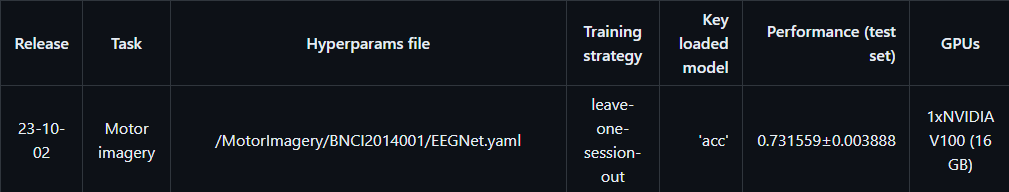

Figure 4: Performance of EEGNet on BNCI2014001 Dataset Averaged Across 10 Random Seeds [6]

###Model 1 (Best Model)

Run this cell to run the experiment with Model 1.

In [ ]:
!./run_hparam_optimization.sh --hparams '/content/benchmarks/benchmarks/MOABB/COMP-432-Project/hparams/model1_hyperparams.yaml' \
--data_folder '/content/data/BNCI2014001'\
--cached_data_folder '/content/data' \
--output_folder '/content/results/hyperparameter-search/BNCI2014001/Model1' \
--nsbj 9 --nsess 2 --nruns 1 --train_mode 'leave-one-session-out' \
--exp_name 'Model1-experiment' \
--nsbj_hpsearch 3 --nsess_hpsearch 2 \
--nruns_eval 3 \
--eval_metric acc \
--exp_max_trials 4

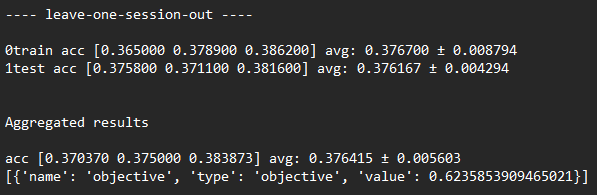

Figure 5: Performace of Model 1

###Model 2

Run this cell to run the experiment with Model 2.

In [ ]:
!./run_hparam_optimization.sh --hparams '/content/benchmarks/benchmarks/MOABB/COMP-432-Project/hparams/model2_hyperparams.yaml' \
--data_folder '/content/data/BNCI2014001'\
--cached_data_folder '/content/data' \
--output_folder '/content/results/hyperparameter-search/BNCI2014001/Model2' \
--nsbj 9 --nsess 2 --nruns 1 --train_mode 'leave-one-session-out' \
--exp_name 'Model2-experiment' \
--nsbj_hpsearch 3 --nsess_hpsearch 2 \
--nruns_eval 3 \
--eval_metric acc \
--exp_max_trials 4

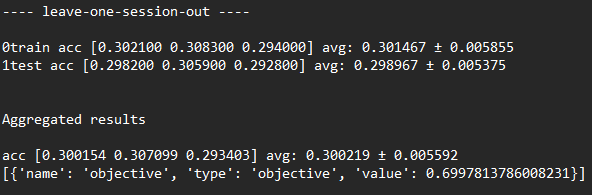

Figure 6: Performace of Model 2

###Model 3

Run this cell to run the experiment with Model 3.

In [ ]:
!./run_hparam_optimization.sh --hparams '/content/benchmarks/benchmarks/MOABB/COMP-432-Project/hparams/model3_hyperparams.yaml' \
--data_folder '/content/data/BNCI2014001'\
--cached_data_folder '/content/data' \
--output_folder '/content/results/hyperparameter-search/BNCI2014001/Model3' \
--nsbj 9 --nsess 2 --nruns 1 --train_mode 'leave-one-session-out' \
--exp_name 'Model3-experiment' \
--nsbj_hpsearch 3 --nsess_hpsearch 2 \
--nruns_eval 3 \
--eval_metric acc \
--exp_max_trials 4

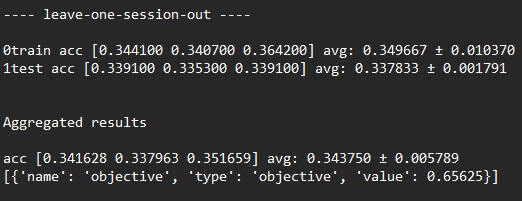

Figure 7: Performace of Model 3

###Discussion

This report presents an analysis of three neural network models that I designed for EEG-based motor imagery decoding. Among these, Model 1 emerged as the most accurate, achieving an accuracy of 37.6415% ± 0.5603. This performance represents a substantial improvement—approximately 10%—over the second-ranked model. Despite this progress, the results also highlight the gap between the capabilities of custom-designed models and the established EEGNet benchmark, which remains significantly higher.

Model 1, while superior among the prototypes developed, still operates at roughly half the accuracy of EEGNet. This underscores the critical impact of hyperparameter tuning and model architecture choices in achieving optimal outcomes.

Another critical aspect observed was the intensive resource requirement for training. The computational demand not only prolongs the development cycle but also elevates the cost. My experience with troubleshooting and refining model training further illustrates the practical challenges encountered in the field.


## **Conclusions**

The project's aim was to enhance EEG-based motor imagery decoding through the development of novel neural network models. Although Model 1 demonstrated the highest accuracy among my models, with a notable 10% improvement over its closest counterpart, it still significantly lags behind the performance benchmarks set by state-of-the-art models such as EEGNet. This discrepancy highlights the challenges associated with the complexity of EEG signal processing.

This project underscores the need for continued efforts in optimizing neural network architectures for EEG decoding. The pursuit of these objectives is essential for making advanced BCI technologies more accessible and effective for therapeutic and assistive applications.



## **References**
[1] W.-L. Zheng and B.-L. Lu, “Investigating Critical Frequency Bands and Channels for EEG-Based Emotion Recognition with Deep Neural Networks,” ResearchGate, https://www.researchgate.net/publication/276443876_Investigating_Critical_Frequency_Bands_and_Channels_for_EEG-Based_Emotion_Recognition_with_Deep_Neural_Networks.

[2] V. J. Lawhern et al., “EEGNet: A compact convolutional neural network for EEG-based brain–computer interfaces,” Journal of Neural Engineering, vol. 15, no. 5, p. 056013, Jul. 2018. doi:10.1088/1741-2552/aace8c

[3] F. Lotte et al., “A review of classification algorithms for EEG-based brain–computer interfaces: A 10 Year update,” Journal of Neural Engineering, vol. 15, no. 3, p. 031005, Apr. 2018. doi:10.1088/1741-2552/aab2f2

[4] S. Asly, “Supervised learning for classification of EEG signals evoked by visual exposure to RGB colors,” ResearchGate, https://www.researchgate.net/publication/335402151_Supervised_learning_for_classification_of_EEG_signals_evoked_by_visual_exposure_to_RGB_colors.

[5] “Moabb.datasets.bnci2014_001,” MOABB, https://moabb.neurotechx.com/docs/generated/moabb.datasets.BNCI2014_001.html#moabb.datasets.BNCI2014_001.

[6] M. Ravanelli et al., “Benchmarks/benchmarks/MOABB at main · speechbrain/benchmarks,” GitHub, https://github.com/speechbrain/benchmarks/tree/main/benchmarks/MOABB.




